In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 1
data = pd.read_csv(r'C:\Users\Xiong\Desktop\LIFE4138\pumpkins_4.csv')

In [17]:
# 2
heaviest_pumpkin = data.loc[data['weight_lbs'].idxmax()]
heaviest_variety = heaviest_pumpkin['variety']
heaviest_location = heaviest_pumpkin['city'] + ", " + heaviest_pumpkin['state_prov'] + ", " + heaviest_pumpkin['country']
heaviest_year = heaviest_pumpkin['id']

print(f"Heaviest Pumpkin: {heaviest_variety} grown in {heaviest_location} during {heaviest_year}")

Heaviest Pumpkin: Baby Bear grown in Chicago, California, Mexico during 2014-P


In [18]:
# 3
def lbs_to_kg(weight_lbs
):
    return weight_lbs * 0.453592

data[
'weight_kg'] = data['weight_lbs'
].apply(lbs_to_kg)

In [19]:
# 4
thresholds = [0, 500, 1000, float('inf')]
labels = ['light', 'medium', 'heavy']
data['weight_class'] = pd.cut(data['weight_lbs'], bins=thresholds, labels=labels)

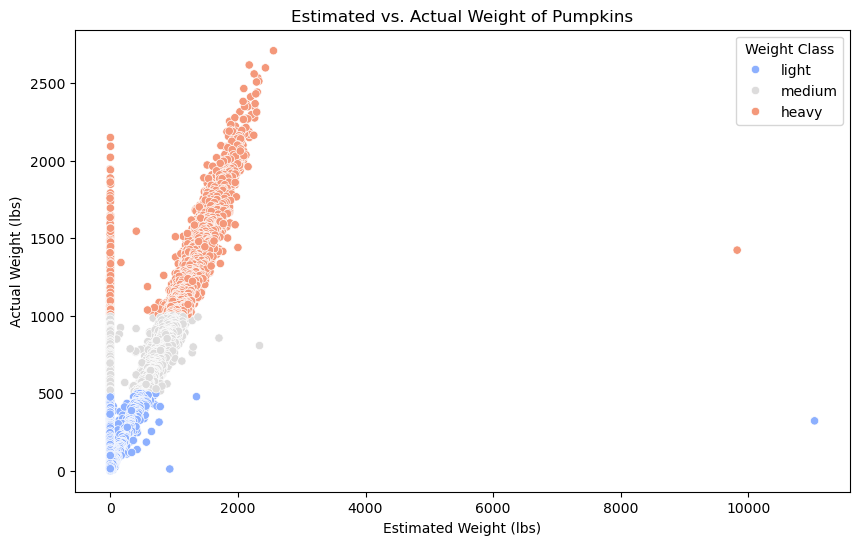

In [20]:
# 5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='est_weight', y='weight_lbs', hue='weight_class', palette='coolwarm')
plt.xlabel('Estimated Weight (lbs)')
plt.ylabel('Actual Weight (lbs)')
plt.title('Estimated vs. Actual Weight of Pumpkins')
plt.legend(title='Weight Class')
plt.savefig(r'C:\Users\Xiong\Desktop\LIFE4138\estimated_vs_actual_weight.png')




In [22]:
# 6
selected_countries = ['USA', 'Canada', 'Germany']
filtered_data = data[data['country'].isin(selected_countries)]
filtered_data.to_csv(r'C:\Users\Xiong\Desktop\LIFE4138\pumpkins_filtered.csv', index=False)




In [12]:
# 7
mean_weight_by_country = filtered_data.groupby('country')['weight_lbs'].mean()
highest_mean_country = mean_weight_by_country.idxmax()
print("Mean weight by country:")
print(mean_weight_by_country)
print(f"Country with the highest mean weight: {highest_mean_country}")

mean_weight_by_variety_country = filtered_data.groupby(['country', 'variety'])['weight_lbs'].mean().reset_index()
lowest_mean_variety_country = mean_weight_by_variety_country.loc[mean_weight_by_variety_country['weight_lbs'].idxmin()]
print("Lowest mean weight variety in a country:")
print(lowest_mean_variety_country)



Mean weight by country:
country
Canada    776.876185
USA       769.360716
Name: weight_lbs, dtype: float64
Country with the highest mean weight: Canada
Lowest mean weight variety in a country:
country             USA
variety       Baby Bear
weight_lbs    726.52564
Name: 4, dtype: object


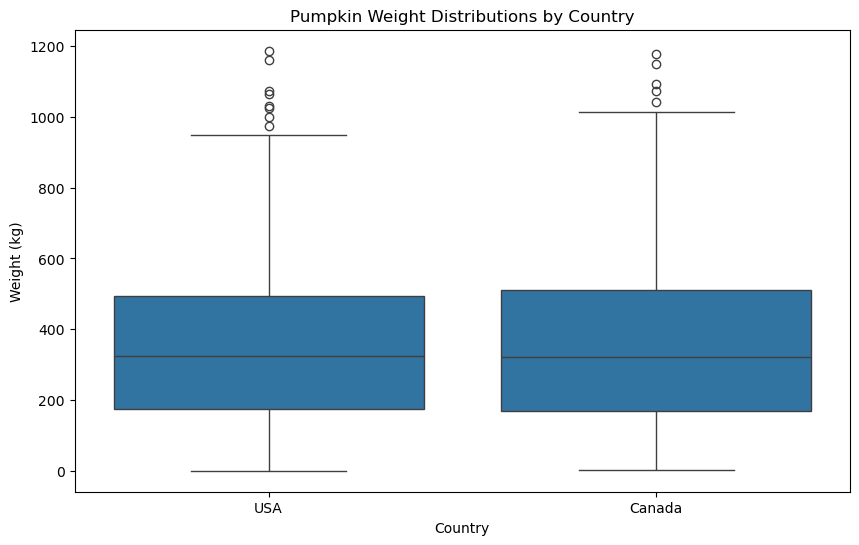

In [23]:
# 8
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='country', y='weight_kg')
plt.xlabel('Country')
plt.ylabel('Weight (kg)')
plt.title('Pumpkin Weight Distributions by Country')
plt.savefig(r'C:\Users\Xiong\Desktop\LIFE4138\weight_distributions_boxplot.png')





In [24]:
plt.close()

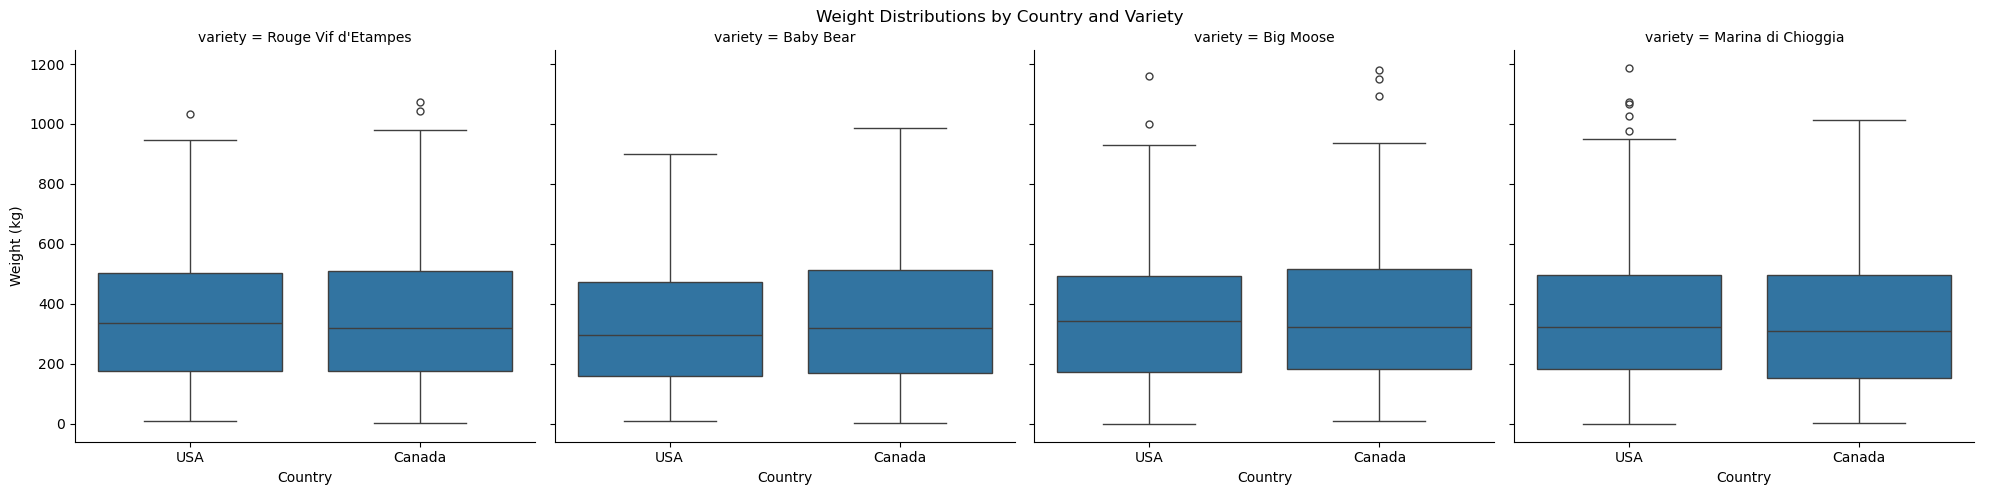

In [26]:
# 9
facet_plot = sns.catplot(data=filtered_data, x='country', y='weight_kg', col='variety', kind='box', col_wrap=4)
facet_plot.set_axis_labels('Country', 'Weight (kg)')
facet_plot.fig.subplots_adjust(top=0.9)
facet_plot.fig.suptitle('Weight Distributions by Country and Variety')
facet_plot.savefig(r'C:\Users\Xiong\Desktop\LIFE4138\facet_weight_distributions.png')



In [28]:
requirements = """pandas
matplotlib
seaborn
"""
with open(r'C:\Users\Xiong\Desktop\LIFE4138\requirements.txt', 'w') as f:
    f.write(requirements)

print("Good job")


Good job
